<a href="https://colab.research.google.com/github/cahmtoledo/RVWorks/blob/master/EP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O Exercício abaixo é o 1D

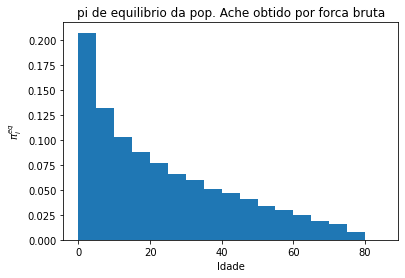

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


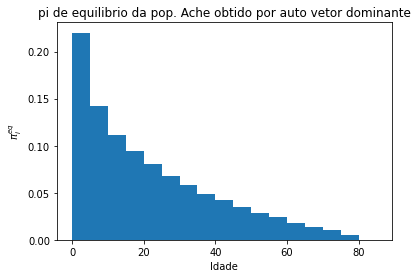

In [0]:
import numpy as np
import matplotlib.pyplot as plt

eps = 0.000000001


def calculatepi (n, i):
  return n[i][0]/n.sum()


L = np.array([[0,0,0.02,0.37,0.67,0.73,0.78,0.68,0.53,0.17,0,0,0,0,0,0,0],
              [0.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0.97,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0.94,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0.98,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0.93,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0.99,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0.93,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0.9,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0.95,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0.87,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0.81,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0.89,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])


#Brute Force solution
n0t= np.array([[1.0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0,0,0]])

n0=n0t.T

n=np.dot(L,n0)

while np.linalg.norm(n-n0)>eps:
  n0=n
  n=np.dot(L,n)
  for j in range(17):
    n[j]=calculatepi(n,j) 



pi= []
for i in range(17):
  pi.append(calculatepi(n,i))

x= [0,5,10,15,20,25,30,35,40,45,50,55, 60,65,70,75,80]

plt.title("pi de equilibrio da pop. Ache obtido por forca bruta")
plt.xlabel("Idade")
plt.ylabel(r"$\pi_{i}^{eq}}$")
plt.bar(x, pi,width=5.0, align = 'edge')
plt.show()

#Podemos usar o método descrito em 1C para calcular de forma "esperta"

einval, einvec = np.linalg.eig(L)

valD = np.argsort(-einval)[0]

v=einvec[:,valD]
v=v/np.sum(v)

plt.title("pi de equilibrio da pop. Ache obtido por auto vetor dominante")
plt.xlabel("Idade")
plt.ylabel(r"$\pi_{i}^{eq}}$")
plt.bar(x, v,width=5.0, align = 'edge')
plt.show()

Autofaces letras: A, B, C, D, F, G, H, I, J, K

In [0]:
from PIL import Image
import numpy
from numpy import *

# Desenvolva o algoritmo usando as imagens pequenas
directory='/img-small/'
WIDTH=25
HEIGHT=30
EPS = 0.00000005

# As imagens grandes podem ser usadas para a versão final #directory=’img/’
#WIDTH=50
#HEIGHT=60

labels=[ 'amber', 'amy', 'andrew', 'andy', 'erin', 'gabe', 'hill', 'jack', 'zach' ]

def vector_from_image(file_name):
  image_struct = Image.open(file_name).convert("L")
  image_data = copy(asarray(image_struct))
  image_vector=[(float(image_data[i, j])) for i in range(HEIGHT) for j in range(WIDTH)]
  return image_vector

def image_from_vector(vector, file_name):
  matrix=vector.reshape((HEIGHT, WIDTH))
  result=empty((HEIGHT, WIDTH, 3), dtype=uint8)
  result[:,:,0]=matrix
  result[:,:,1]=matrix
  result[:,:,2]=matrix
  Image.fromarray(result).save(file_name)

def load_images():
  images_set=[]
  for index in range(len(labels)):
    file_name=directory+labels[index]+'1.png'
    vec=vector_from_image(file_name)
    images_set.append(vec)
    file_name=directory+labels[index]+'2.png'
    vec=vector_from_image(file_name)
    images_set.append(vec)
    file_name=directory+labels[index]+'3.png'
    vec=vector_from_image(file_name)
    images_set.append(vec)
  return array(images_set)



imagens = load_images()

#Calculando o vetor medio B
vetorMedio = mean(imagens, axis = 0)

image_from_vector(vetorMedio, "FaceMedia.png")


#print(shape(vetorMedio))


#C
imagensMenosMedia = array([i-vetorMedio for i in imagens]) #Vou usar o vetor médio invés da face média para diminuir os erros


novoVetorMedio = mean(imagensMenosMedia, axis = 0)

#print(abs(novoVetorMedio)<EPS) Isso mostra para gente que o novoVetorMedio é zero, levando em conta o erro

#D

#Matriz de covariância
M = cov(imagensMenosMedia.T)

print(M)

#G

#Autovalor e autovetor da matriz de covariância
einval, einvec = linalg.eigh(M)
#print(einval)


#H

Dval = argsort(-einval)


soma = 0
n=0

while soma < 0.9*trace(M):
  soma+=einval[Dval[n]]
  n+=1


print(n)

#I
#Produzindo autofaces (veja na pasta resultados)

for i in range(n+1):
  image_from_vector(einvec[Dval[i]]*255 + vetorMedio, "autoface" + str(i) +".png")


#J

#Decompondo a nova imagem em autovetores
file_name = directory+'person1.png'
person = vector_from_image(file_name)

person = person-vetorMedio
decomp = []
vetorfinal = empty_like(vetorMedio)
for i in range(n+1):
  decomp.append(dot(person,einvec[Dval[i]])/linalg.norm(person))
  #person-=decomp[i]*einvec[Dval[i]]
  vetorfinal+=decomp[i]*einvec[Dval[i]]


#K  

image_from_vector(vetorfinal, "finalSemMedia.png")




[[6903.15669516 5507.2008547  3695.43019943 ... -398.17663818
   740.16381766  702.6980057 ]
 [5507.2008547  5346.33333333 4377.90598291 ... -550.87606838
   662.7991453   701.70940171]
 [3695.43019943 4377.90598291 4416.65242165 ... -405.32621083
   716.04415954  554.70655271]
 ...
 [-398.17663818 -550.87606838 -405.32621083 ... 4381.72079772
  4319.65099715 4151.10826211]
 [ 740.16381766  662.7991453   716.04415954 ... 4319.65099715
  5349.9002849  5784.5968661 ]
 [ 702.6980057   701.70940171  554.70655271 ... 4151.10826211
  5784.5968661  7847.24216524]]
9


FileNotFoundError: ignored

Autofaces letra: E, não consegui deixar em uma escala vizualizável

Code taken from github: https://github.com/HowDoIUseThis/GershgorinCircles/blob/master/EAprox.py

(750, 750)
[[6903.156695156696, 1077924.91025641], [5346.333333333333, 989983.6709401712], [4416.652421652422, 821888.4729344723], [2926.361823361823, 627615.5128205128], [1521.3960113960115, 387308.6623931624], [997.2307692307693, 254103.53846153838], [1056.0968660968665, 248143.87891737893], [1483.4615384615383, 315777.78205128177], [1788.5641025641028, 380650.1025641026], [1814.0256410256413, 436485.94017093984], [1463.9344729344732, 415494.9002849002], [1114.678062678063, 347910.87321937346], [1398.8717948717951, 476677.8290598293], [1676.3076923076924, 563307.1538461545], [1815.0712250712252, 595494.1737891735], [1886.1225071225072, 589346.6851851841], [2377.1652421652425, 618930.6025641025], [3019.977207977208, 713887.5498575491], [3593.7179487179496, 818835.1196581193], [3654.333333333335, 854974.3803418807], [3730.8148148148157, 874156.2207977201], [3163.0199430199423, 790037.3618233607], [2054.564102564103, 579205.7606837612], [1669.6438746438741, 360106.79487179447], [3475.02

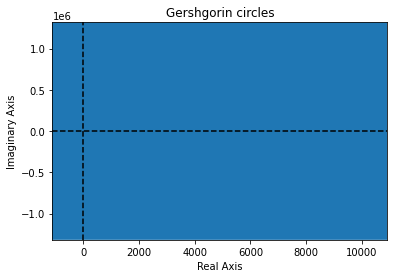

In [0]:
from PIL import Image
import numpy
from numpy import *
from math import fabs
import matplotlib.pyplot as plt
from numpy import linalg as LA

# Desenvolva o algoritmo usando as imagens pequenas
directory='/img-small/'
WIDTH=25
HEIGHT=30
EPS = 0.00000005

# As imagens grandes podem ser usadas para a versão final #directory=’img/’
#WIDTH=50
#HEIGHT=60

labels=[ 'amber', 'amy', 'andrew', 'andy', 'erin', 'gabe', 'hill', 'jack', 'zach' ]

def vector_from_image(file_name):
  image_struct = Image.open(file_name).convert("L")
  image_data = copy(asarray(image_struct))
  image_vector=[(float(image_data[i, j])) for i in range(HEIGHT) for j in range(WIDTH)]
  return image_vector

def image_from_vector(vector, file_name):
  matrix=vector.reshape((HEIGHT, WIDTH))
  result=empty((HEIGHT, WIDTH, 3), dtype=uint8)
  result[:,:,0]=matrix
  result[:,:,1]=matrix
  result[:,:,2]=matrix
  Image.fromarray(result).save(file_name)

def load_images():
  images_set=[]
  for index in range(len(labels)):
    file_name=directory+labels[index]+'1.png'
    vec=vector_from_image(file_name)
    images_set.append(vec)
    file_name=directory+labels[index]+'2.png'
    vec=vector_from_image(file_name)
    images_set.append(vec)
    file_name=directory+labels[index]+'3.png'
    vec=vector_from_image(file_name)
    images_set.append(vec)
  return array(images_set)


def GregsCircles(matrix):
    if isSquare(matrix) != True:
        print('Your input matrix is not square!')
        return []
    circles = []
    for x in range(0,len(matrix)):
        radius = 0
        piv = matrix[x][x]
        for y in range(0,len(matrix)):
            if x != y:
                radius += fabs(matrix[x][y])
        circles.append([piv,radius])
    return circles

def plotCircles(circles):
    index, radi = zip(*circles)
    Xupper = max(index) + std(index)
    Xlower = min(index) - std(index)
    Ylimit = max(radi) +  std(index)
    fig, ax = plt.subplots() 
    ax = plt.gca()
    ax.cla()
    ax.set_xlim((Xlower,Xupper))
    ax.set_ylim((-Ylimit,Ylimit))
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.title('Gershgorin circles')
    for x in range(0,len(circles)):
        circ = plt.Circle((index[x],0), radius = radi[x])
        ax.add_artist(circ)
    ax.plot([Xlower,Xupper],[0,0],'k--')
    ax.plot([0,0],[-Ylimit,Ylimit],'k--')
    fig.savefig('plotcircles.png')
    
def isSquare(m):
    cols = len(m)
    for row in m:
        if len(row) != cols:
            return False
    return True

def main():
    
  imagens = load_images()

  #Calculando o vetor medio B
  vetorMedio = mean(imagens, axis = 0)

  image_from_vector(vetorMedio, "FaceMedia.png")


  #print(shape(vetorMedio))


  #C
  imagensMenosMedia = array([i-vetorMedio for i in imagens]) #Vou usar o vetor médio invés da face média para diminuir os erros


  novoVetorMedio = mean(imagensMenosMedia, axis = 0)

  #print(abs(novoVetorMedio)<EPS) Isso mostra para gente que o novoVetorMedio é zero, levando em conta o erro

  #Matriz de covariância
  M = cov(imagensMenosMedia.T)
  print(shape(M))
  temp = GregsCircles(M)
  #test = array([[10,-1,0,1],[0.2,8,0.2,0.2],[1,1,2,1],[-1,-1,-1,-11]])
  #temp = GregsCircles(test)
  print(temp)
  plotCircles(temp)

if __name__ == '__main__':
    main()

# New Section

# New Section